In [100]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from sklearn import tree as tr

QUESTION 1

In [101]:
#load breast cancer dataset
data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
display(cancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    , y, test_size=0.4,random_state=11, shuffle=True)

<AxesSubplot:xlabel='symmetry error', ylabel='worst area'>

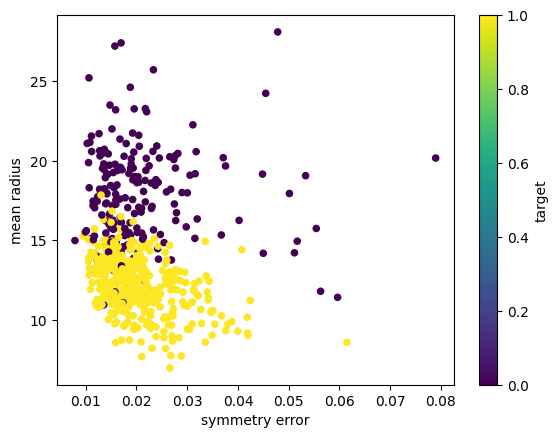

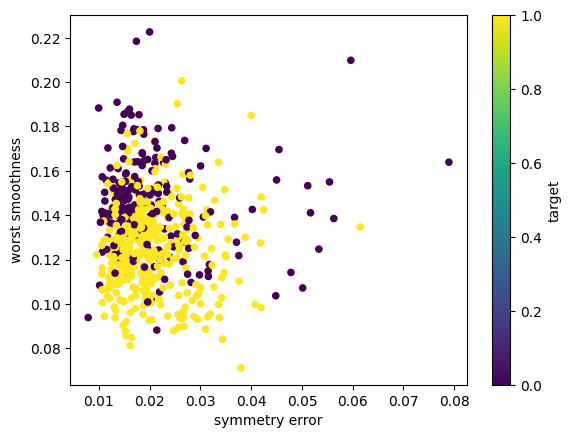

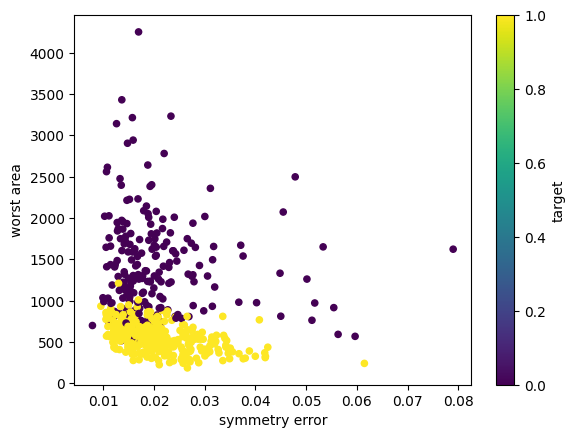

In [102]:
#use scatter plots
cancer_df.plot.scatter(x='symmetry error', y='mean radius', s=20, c='target', colormap='viridis')
cancer_df.plot.scatter(x='symmetry error', y='worst smoothness', s=20, c='target', colormap='viridis')
cancer_df.plot.scatter(x='symmetry error', y='worst area', s=20, c='target', colormap='viridis')

<AxesSubplot:>

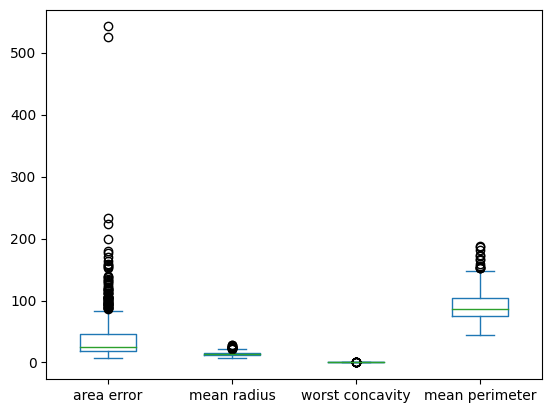

In [103]:
#use plot box
cancer_df[['area error','mean radius','worst concavity','mean perimeter']].plot.box()

In [104]:
#create a training and test set with shuffling

cancer_df=shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)

train_df, test_df = train_test_split(cancer_df)

C:\Users\nilsu\PycharmProjects\pythonProject11\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


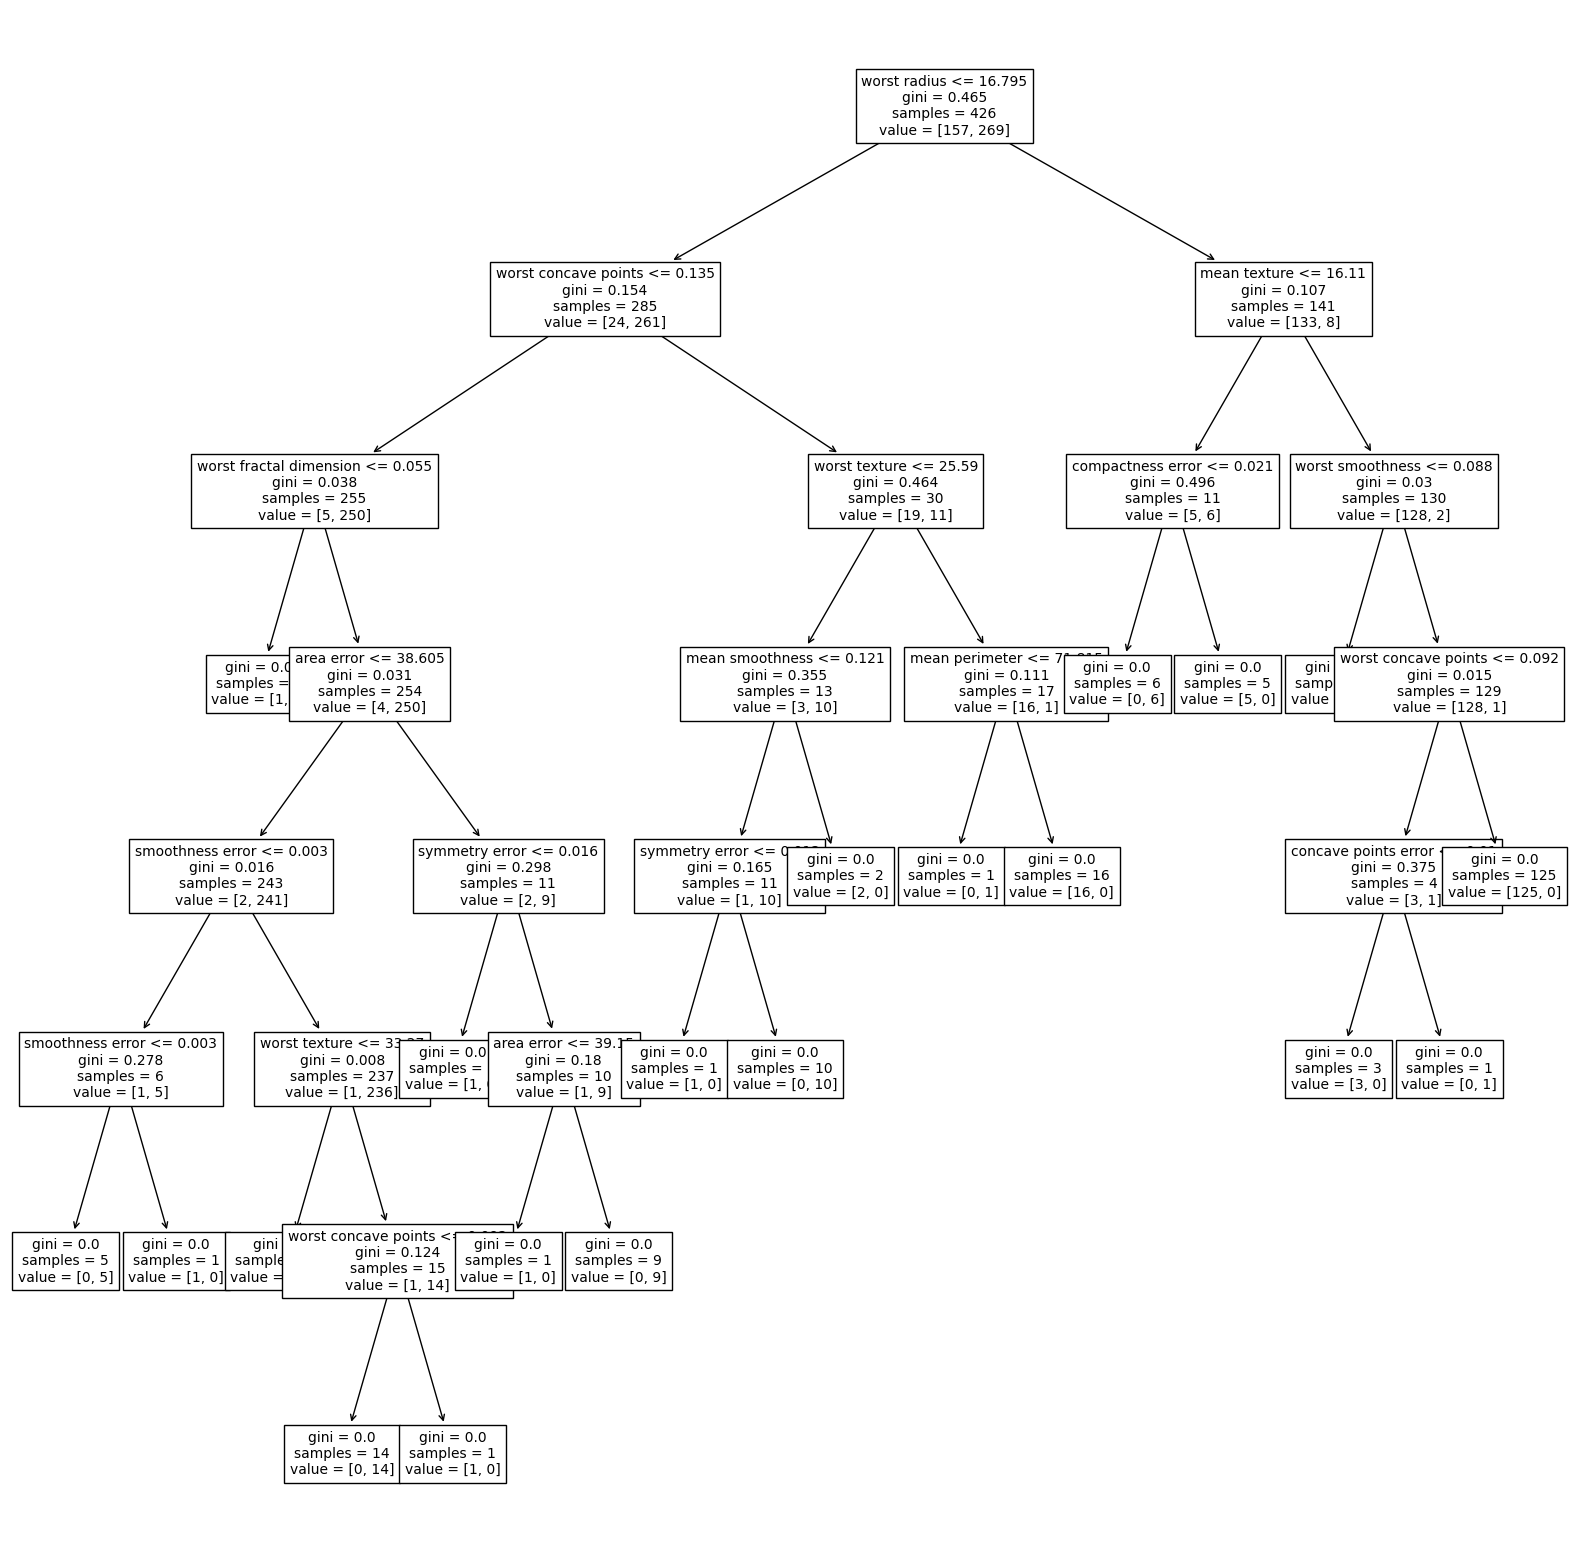

In [105]:
#train decision tree classifier using the training set

tree = DecisionTreeClassifier(max_depth=10)
#DecisionTreeClassifier(criterion='entropy')   #default criterion is 'gini'
#help(DecisionTreeClassifier)
tree.fit(train_df.drop('target', axis=1), train_df['target'])  #equivalent to tree.fit(X,y)

pyplot.figure(figsize=(20,20))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

Text(0.5, 1.0, 'Feature Importance')

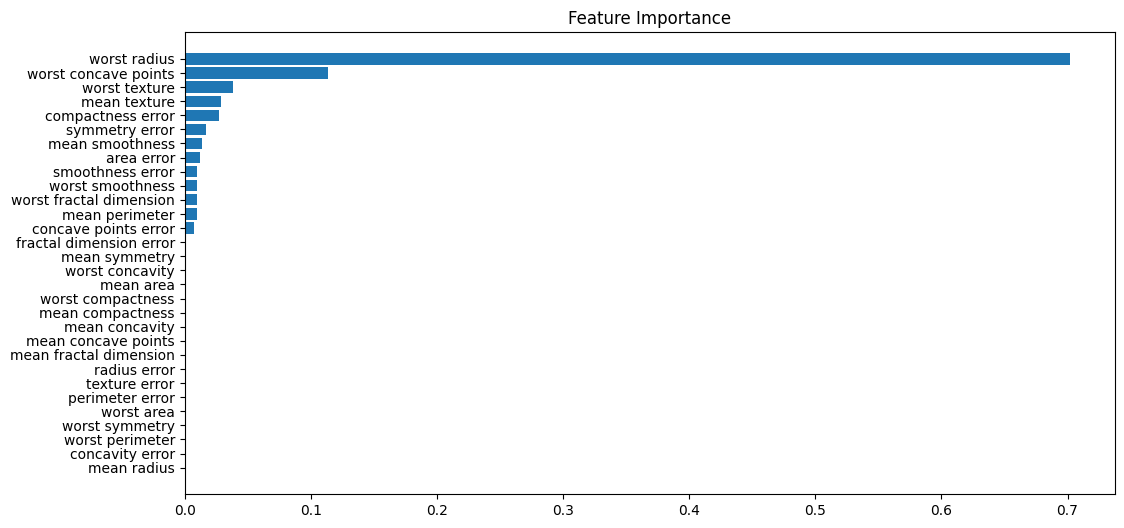

In [106]:
#top 5 most important features

#reference to https://colab.research.google.com/github/rasgointelligence/feature-engineering-tutorials/blob/main/feature-importance/Sklearn%20Feature%20Importance.ipynb#scrollTo=Xch_oVbMtf84

from matplotlib import pyplot as plt

feature_importance = tree.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test_df.columns)[sorted_idx])
plt.title('Feature Importance')

In [107]:
#train a logistic regression model using the training set

lr_orig = LogisticRegression(C=0.01, max_iter=1000)
lr_orig.fit(train_df.drop(['target'], axis=1),train_df['target'])

C:\Users\nilsu\PycharmProjects\pythonProject11\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=0.01, max_iter=1000)

In [108]:
# decision tree score on test set
print("Decision tree score: ",tree.score(test_df.drop('target',axis=1), test_df['target']))

#logistic regression score on test
print("Linear regression score: ",lr_orig.score(test_df.drop(['target'], axis=1), test_df['target']))

if tree.score(test_df.drop('target', axis=1), test_df['target'])>lr_orig.score(test_df.drop(['target'], axis=1), test_df['target']):
    print("Decision is better than linear regression")
else:
    print("Linear regression is better than decision tree")


Decision tree score:  0.972027972027972
Linear regression score:  0.9300699300699301
Decision is better than linear regression


C:\Users\nilsu\PycharmProjects\pythonProject11\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\nilsu\PycharmProjects\pythonProject11\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\nilsu\PycharmProjects\pythonProject11\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\nilsu\PycharmProjects\pythonProject11\venv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['s

QUESTION 2

In [109]:
#get csv file
cancer_df = pd.read_csv('winequality_white.csv', sep=';')
cancer_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [110]:
#last column is the target variable
X=cancer_df[0:11]
y= cancer_df['quality']

In [111]:
cancer_train_df, cancer_test_df = train_test_split(cancer_df)

In [112]:
cancer_train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4628,6.1,0.19,0.37,2.6,0.041,24.0,99.0,0.99153,3.18,0.50,10.9,6
1072,8.2,0.29,0.33,9.1,0.036,28.0,118.0,0.99530,2.96,0.40,10.9,7
4756,6.0,0.38,0.26,3.5,0.035,38.0,111.0,0.98872,3.18,0.47,13.6,7
3614,6.4,0.38,0.24,7.2,0.047,41.0,151.0,0.99604,3.11,0.60,9.2,5
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6


In [113]:
#train a decision tree regressor using the training set
tree_reg = DecisionTreeRegressor(max_depth=30, min_samples_split=3)
tree_reg.fit(cancer_train_df.drop('quality',axis=1),cancer_train_df['quality'])


DecisionTreeRegressor(max_depth=30, min_samples_split=3)

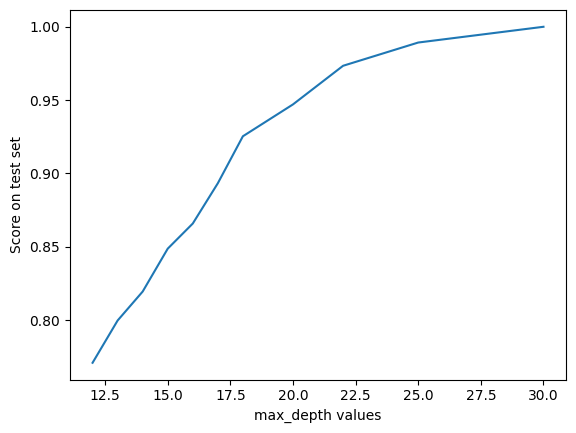

Best min_sample_split parameter:  2
Best max_depth parameter:  30



In [114]:
mdepths = [12, 13, 14, 15, 16, 17, 18, 20, 22, 25, 30]
msplits= [12,11,10,9,8,7,6,5,4,3,2]
errors = np.zeros(11)
index=0
max_u=0
index_of_depths=-1
index_of_msplits=-1
for d, s in zip(mdepths, msplits):
    tree_reg = DecisionTreeRegressor(max_depth=d, min_samples_split=s)
    tree_reg.fit(cancer_test_df.drop('quality',axis=1),cancer_test_df['quality'])
    #u=mean_squared_error(tree_reg.predict(cancer_test_df.drop('quality',axis=1)), cancer_test_df['quality'])
    u=tree_reg.score(cancer_test_df.drop('quality',axis=1), cancer_test_df['quality'])
    errors[index]=u
    index+=1
    if u>max_u:
        max_u=u
        index_of_depths = index
        index_of_msplits = msplits.index(s)

x = np.array(range(0,11))
pyplot.plot(mdepths, errors)
pyplot.xlabel('max_depth values')
pyplot.ylabel('Score on test set')
pyplot.show()

print("Best min_sample_split parameter: ", msplits[index_of_msplits])
print("Best max_depth parameter: ", mdepths[index_of_depths-1])
print()


In [115]:
#train a decision tree regressor using the training set
tree_reg_for_best_parameters = DecisionTreeRegressor(max_depth=msplits[index_of_msplits], min_samples_split=mdepths[index_of_depths-1])
tree_reg_for_best_parameters.fit(cancer_train_df.drop('quality',axis=1),cancer_train_df['quality'])


# Test data error
print("MSE with best parameters: ",mean_squared_error(tree_reg_for_best_parameters.predict(cancer_test_df.drop('quality',axis=1)), cancer_test_df['quality']))

MSE with best parameters:  0.5964236472420326
